In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.table import Table

In [3]:
# DOWNLOAD THE FITS FILE FROM www.sdss.org/dr16/algorithms/qso_catalog/ AND PUT INTO THE DIRECTORY BELOW
filepath = '/quirky_quasars/data/catalogues/DR16Q_v4.fits'
# filepath = '/disk1/hrb/python/data/catalogues/qsos/dr16q/DR16Q_v4.fits' # Leave this commented out.

In [54]:
dr16q = Table.read(filepath)

In [55]:
# Let's look at the first 5 rows
dr16q[:5]

SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,THING_ID,Z_VI,Z_CONF,CLASS_PERSON,Z_DR12Q,IS_QSO_DR12Q,Z_DR7Q_SCH,IS_QSO_DR7Q,Z_DR6Q_HW,Z_DR7Q_HW,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,OBJID,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,Z_DLA [5],NHI_DLA [5],CONF_DLA [5],BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,ERR_AI_SIIV,BOSS_TARGET1,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,NSPEC_SDSS,NSPEC_BOSS,NSPEC,PLATE_DUPLICATE [74],MJD_DUPLICATE [74],FIBERID_DUPLICATE [74],SPECTRO_DUPLICATE [74],SKYVERSION,RUN_NUMBER,RERUN_NUMBER,CAMCOL_NUMBER,FIELD_NUMBER,ID_NUMBER,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,PSFFLUX [5],PSFFLUX_IVAR [5],PSFMAG [5],PSFMAGERR [5],EXTINCTION [5],M_I,SN_MEDIAN_ALL,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,W1_FLUX,W1_FLUX_IVAR,W1_MAG,W1_MAG_ERR,W1_CHI2,W1_FLUX_SNR,W1_SRC_FRAC,W1_EXT_FLUX,W1_EXT_FRAC,W1_NPIX,W2_FLUX,W2_FLUX_IVAR,W2_MAG,W2_MAG_ERR,W2_CHI2,W2_FLUX_SNR,W2_SRC_FRAC,W2_EXT_FLUX,W2_EXT_FRAC,W2_NPIX,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,JMAG,JMAG_ERR,JSNR,JRDFLAG,HMAG,HMAG_ERR,HSNR,HRDFLAG,KMAG,KMAG_ERR,KSNR,KRDFLAG,SDSS2MASS_SEP,2RXS_ID,2RXS_RA,2RXS_DEC,2RXS_SRC_FLUX,2RXS_SRC_FLUX_ERR,SDSS2ROSAT_SEP,XMM_SRC_ID,XMM_RA,XMM_DEC,XMM_SOFT_FLUX,XMM_SOFT_FLUX_ERR,XMM_HARD_FLUX,XMM_HARD_FLUX_ERR,XMM_TOTAL_FLUX,XMM_TOTAL_FLUX_ERR,XMM_TOTAL_LUM,SDSS2XMM_SEP,GAIA_MATCHED,GAIA_DESIGNATION,GAIA_RA,GAIA_DEC,GAIA_PARALLAX,GAIA_PARALLAX_ERR,GAIA_PM_RA,GAIA_PM_RA_ERR,GAIA_PM_DEC,GAIA_PM_DEC_ERR,GAIA_G_MAG,GAIA_G_FLUX_SNR,GAIA_BP_MAG,GAIA_BP_FLUX_SNR,GAIA_RP_MAG,GAIA_RP_FLUX_SNR,SDSS2GAIA_SEP
bytes18,float64,float64,int32,int32,int16,bytes6,bytes6,int16,float64,int16,float64,int16,int16,int16,int64,float64,int16,int16,float64,int16,float64,int16,float64,float64,int16,float64,bytes12,float64,int32,bytes19,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int32,int32,int32,int32,int32,int16,int16,uint8,int32,bytes3,int32,int32,int32,float64,float64,float64,float64,bytes14,int32,float64,float32,float64,float32,float64,float32,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,bytes21,float64,float64,float32,float32,float64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,int16,bytes28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
000000.15+353104.2,0.0006294989251500738,35.51784115297793,7750,58402,802,QSO,QSO,1,0.8441383104284588,0,-1.0,-1,-1,-1,405570842,-1.0,0,0,-1.0,0,-1.0,-1,-1.0,-1.0,1,0.8454347848892212,PIPE,0.8454347848892212,0,1237666185111273711,0.845751479344974,0,16996.66972831516,-1.0,7682,0.0,0.8436375149058963,0,156.43772375163678,0.8428504859071788,0,750.8834989041113,0.8940224387238764,2050,21.324610028391675,-1.0,7682,0.0,-1.0,7682,0.0,0.84575146,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1024,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,-1 .. -1,2,4822,301,4,530,239,5400.0,0.0,70.60620880126953,106.47489166259766,eboss1,

In [56]:
# What columns are included in DR16Q? Crikey! That's a lot. The description of each of these 
# can be found at the bottom of the DR16Q paper: https://ui.adsabs.harvard.edu/abs/2020ApJS..250....8L/abstract
list(dr16q.columns)

['SDSS_NAME',
 'RA',
 'DEC',
 'PLATE',
 'MJD',
 'FIBERID',
 'AUTOCLASS_PQN',
 'AUTOCLASS_DR14Q',
 'IS_QSO_QN',
 'Z_QN',
 'RANDOM_SELECT',
 'Z_10K',
 'Z_CONF_10K',
 'PIPE_CORR_10K',
 'IS_QSO_10K',
 'THING_ID',
 'Z_VI',
 'Z_CONF',
 'CLASS_PERSON',
 'Z_DR12Q',
 'IS_QSO_DR12Q',
 'Z_DR7Q_SCH',
 'IS_QSO_DR7Q',
 'Z_DR6Q_HW',
 'Z_DR7Q_HW',
 'IS_QSO_FINAL',
 'Z',
 'SOURCE_Z',
 'Z_PIPE',
 'ZWARNING',
 'OBJID',
 'Z_PCA',
 'ZWARN_PCA',
 'DELTACHI2_PCA',
 'Z_HALPHA',
 'ZWARN_HALPHA',
 'DELTACHI2_HALPHA',
 'Z_HBETA',
 'ZWARN_HBETA',
 'DELTACHI2_HBETA',
 'Z_MGII',
 'ZWARN_MGII',
 'DELTACHI2_MGII',
 'Z_CIII',
 'ZWARN_CIII',
 'DELTACHI2_CIII',
 'Z_CIV',
 'ZWARN_CIV',
 'DELTACHI2_CIV',
 'Z_LYA',
 'ZWARN_LYA',
 'DELTACHI2_LYA',
 'Z_LYAWG',
 'Z_DLA',
 'NHI_DLA',
 'CONF_DLA',
 'BAL_PROB',
 'BI_CIV',
 'ERR_BI_CIV',
 'AI_CIV',
 'ERR_AI_CIV',
 'BI_SIIV',
 'ERR_BI_SIIV',
 'AI_SIIV',
 'ERR_AI_SIIV',
 'BOSS_TARGET1',
 'EBOSS_TARGET0',
 'EBOSS_TARGET1',
 'EBOSS_TARGET2',
 'ANCILLARY_TARGET1',
 'ANCILLARY_TARGET2'

In [106]:
# Let's filter by g < 17, z < 0.5 and nspec > 1
mask = (dr16q['PSFMAG'][:,1] < 17.5) &  (dr16q['Z'] < 0.5) & (dr16q['NSPEC'] > 2)

In [107]:
dr16q[mask]

SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,THING_ID,Z_VI,Z_CONF,CLASS_PERSON,Z_DR12Q,IS_QSO_DR12Q,Z_DR7Q_SCH,IS_QSO_DR7Q,Z_DR6Q_HW,Z_DR7Q_HW,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,OBJID,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,Z_DLA [5],NHI_DLA [5],CONF_DLA [5],BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,ERR_AI_SIIV,BOSS_TARGET1,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,NSPEC_SDSS,NSPEC_BOSS,NSPEC,PLATE_DUPLICATE [74],MJD_DUPLICATE [74],FIBERID_DUPLICATE [74],SPECTRO_DUPLICATE [74],SKYVERSION,RUN_NUMBER,RERUN_NUMBER,CAMCOL_NUMBER,FIELD_NUMBER,ID_NUMBER,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,PSFFLUX [5],PSFFLUX_IVAR [5],PSFMAG [5],PSFMAGERR [5],EXTINCTION [5],M_I,SN_MEDIAN_ALL,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,W1_FLUX,W1_FLUX_IVAR,W1_MAG,W1_MAG_ERR,W1_CHI2,W1_FLUX_SNR,W1_SRC_FRAC,W1_EXT_FLUX,W1_EXT_FRAC,W1_NPIX,W2_FLUX,W2_FLUX_IVAR,W2_MAG,W2_MAG_ERR,W2_CHI2,W2_FLUX_SNR,W2_SRC_FRAC,W2_EXT_FLUX,W2_EXT_FRAC,W2_NPIX,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,JMAG,JMAG_ERR,JSNR,JRDFLAG,HMAG,HMAG_ERR,HSNR,HRDFLAG,KMAG,KMAG_ERR,KSNR,KRDFLAG,SDSS2MASS_SEP,2RXS_ID,2RXS_RA,2RXS_DEC,2RXS_SRC_FLUX,2RXS_SRC_FLUX_ERR,SDSS2ROSAT_SEP,XMM_SRC_ID,XMM_RA,XMM_DEC,XMM_SOFT_FLUX,XMM_SOFT_FLUX_ERR,XMM_HARD_FLUX,XMM_HARD_FLUX_ERR,XMM_TOTAL_FLUX,XMM_TOTAL_FLUX_ERR,XMM_TOTAL_LUM,SDSS2XMM_SEP,GAIA_MATCHED,GAIA_DESIGNATION,GAIA_RA,GAIA_DEC,GAIA_PARALLAX,GAIA_PARALLAX_ERR,GAIA_PM_RA,GAIA_PM_RA_ERR,GAIA_PM_DEC,GAIA_PM_DEC_ERR,GAIA_G_MAG,GAIA_G_FLUX_SNR,GAIA_BP_MAG,GAIA_BP_FLUX_SNR,GAIA_RP_MAG,GAIA_RP_FLUX_SNR,SDSS2GAIA_SEP
bytes18,float64,float64,int32,int32,int16,bytes6,bytes6,int16,float64,int16,float64,int16,int16,int16,int64,float64,int16,int16,float64,int16,float64,int16,float64,float64,int16,float64,bytes12,float64,int32,bytes19,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int32,int32,int32,int32,int32,int16,int16,uint8,int32,bytes3,int32,int32,int32,float64,float64,float64,float64,bytes14,int32,float64,float32,float64,float32,float64,float32,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,bytes21,float64,float64,float32,float32,float64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,int16,bytes28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100417.96+282444.1,151.07484297406717,28.412269688389422,6471,56309,794,QSO,QSO,1,0.3297257062418797,0,-1.0,-1,-1,-1,357023185,0.328,3,3,0.3283706605434418,1,0.3282,1,0.328307,0.3283019959926605,1,0.328,VI,0.32837095856666565,0,1237667113337290759,0.32819814362128,0,532100.1468921155,0.3285074314431071,0,5036.115801336863,0.32861611810479774,0,1118.0765732163086,0.3304506124880997,0,1437.2223734148688,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,0.32819813,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,8192,1,3,4,2345 .. -1,53757 .. -1,549 .. -1,1 .. -1,2,5038,301,5,167,7,5400.0,0.0,46.210533142089844,141.677

In [108]:
# checking the spec columns of the table above
spec_cols = ['NSPEC_SDSS','NSPEC_BOSS','NSPEC']
dr16q[mask][spec_cols]

NSPEC_SDSS,NSPEC_BOSS,NSPEC
int32,int32,int32
1,3,4
1,2,3
1,2,3


Looks like for the quasars which satisfy those constraints, they have one spectrum from SDSS and one from BOSS. But what about TDSS and eBOSS!?

## Looking at SDSS data after querying for additional spectra

In [1]:
# Adding an int_id column
# int_qsos = pd.read_csv('data/int_prop_qsos.csv')
# int_qsos['int_id'] = np.arange(1,450)
# int_qsos = int_qsos.set_index('int_id')
# int_qsos.to_csv('data/int_prop_qsos.csv'

In [11]:
# Read in fetched data from casjobs
int_qsos = pd.read_csv('data/qsos_spec_secondary.csv', index_col='int_id')
# int_qsos = pd.read_csv('data/PGQ_spec_secondary.csv', index_col='pgq_id')
# Remove bad photometry
int_qsos = int_qsos[int_qsos['g']!=-9999]

In [12]:
# int_qsos = int_qsos[(16 < int_qsos['g']) & (int_qsos['g'] < 17)]
int_qsos = int_qsos[(int_qsos['g'] < 17)]

In [13]:
# Quick look at the data
int_qsos

,dist_arcsec,ra,dec,g,z,fiberID,plate,mjd,bestobjid,specobjid
int_id,,,,,,,,,,
1,0.013604,118.07430,19.595080,15.92508,0.117007,612,1582,52939,1237661125071208589,1781341927212345344
2,0.081081,178.89730,12.881670,16.95386,0.121609,469,1610,53144,1237661813346009111,1812827820502575104
3,0.101141,144.36910,32.763470,16.35206,0.126988,466,1943,53386,1237664870287736963,2187751668907534336
4,0.053337,208.52680,23.430390,16.31171,0.055235,517,2783,54524,1237665566604525581,3133521628521064448
5,0.030733,231.49390,18.237820,16.65883,0.129969,483,2794,54537,1237665566614159471,3145897181865601024
...,...,...,...,...,...,...,...,...,...,...
446,0.016550,254.87420,42.768230,16.89240,0.173816,988,8533,58017,1237662701332136105,9607575618964443136
447,0.038821,129.54560,24.895280,16.64696,0.028656,218,1930,53347,1237664667887534206,2173046799743346688
448,0.000091,24.98236,6.322933,16.80768,0.395375,767,8755,58138,1237667227682472026,9857464652296114176


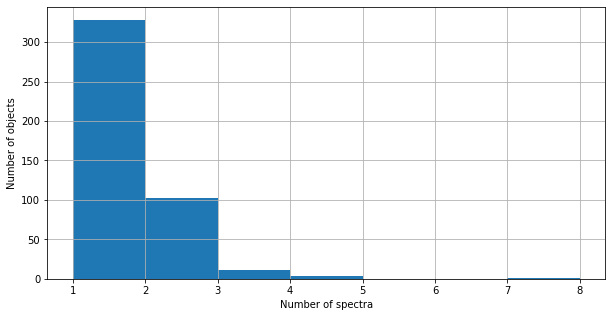

In [14]:
# Plot nspec distribution
fig, ax = plt.subplots(1,1, figsize=(10,5))
int_qsos.index.value_counts().hist(bins=np.arange(1,9), ax=ax)
ax.set(xlabel='Number of spectra', ylabel='Number of objects');

In [15]:
# Creating a column which tells us how many spectra an object has, and appending it to original dataframe
int_qsos['nspec'] = 0 # intialise an nspec column
for int_id, counts in int_qsos.index.value_counts().iteritems():
    int_qsos.loc[int_id, 'nspec'] = counts

In [19]:
# How many objects have more than nspec number of spectra?
nspec = 2
subset = int_qsos[int_qsos['nspec']>=nspec]
print('There are {} quasars with {} or more spectra'.format(len(subset.index.unique()),nspec))
subset

There are 118 quasars with 2 or more spectra


,dist_arcsec,ra,dec,g,z,fiberID,plate,mjd,bestobjid,specobjid,nspec
int_id,,,,,,,,,,,
10,0.083243,137.54170,48.228250,16.87082,0.116970,58,765,52254,1237657772316622887,861329409469081600,2
10,0.017425,137.54170,48.228250,16.87082,0.116452,610,7314,56990,1237657772316622887,8234999711444258816,2
11,0.068415,228.89690,48.091830,16.41499,0.311276,98,1330,52822,1237659162269777994,1497473861480900608,2
11,0.022345,228.89690,48.091830,16.41499,0.311537,220,8431,57482,1237659162269777994,9492522713258151936,2
12,0.011124,161.67620,39.338340,16.41776,0.390265,134,1433,53035,1237661382241353805,1613451451063887872,2
...,...,...,...,...,...,...,...,...,...,...,...
443,0.011261,259.00810,31.203860,16.00142,0.110333,524,978,52441,1237655503499886636,1101274185868535808,2
445,0.032934,165.80390,41.698600,16.56802,0.401620,418,1437,53046,1237662195594035235,1618033116201379840,2
445,0.025238,165.80390,41.698600,16.56802,0.402428,818,8366,57432,1237662195594035235,9419503595462873088,2


array([<AxesSubplot:title={'center':'ra'}>], dtype=object)

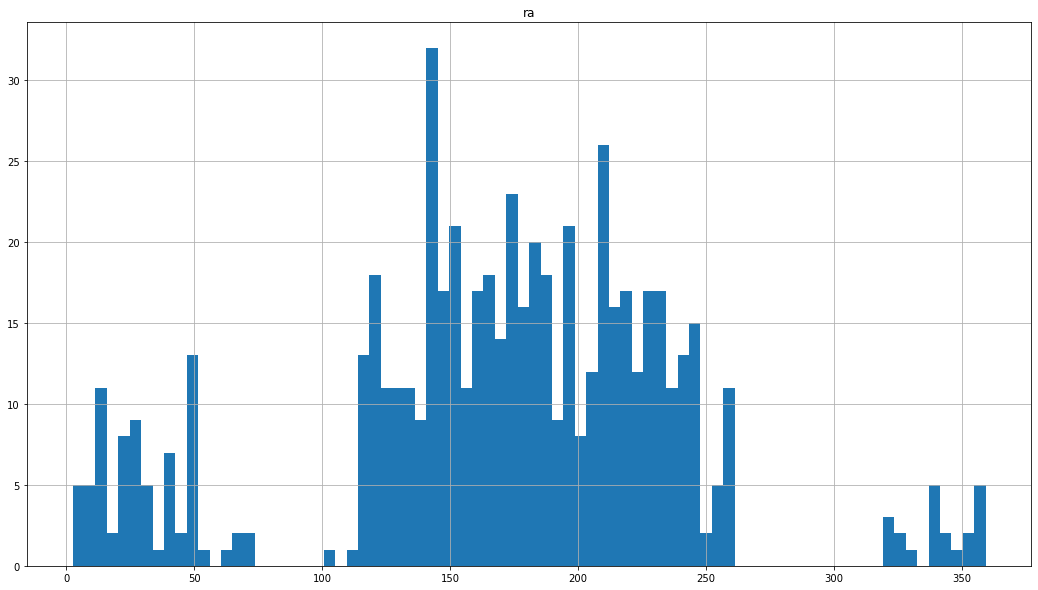

In [18]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
subset[['ra']].hist(ax=ax, bins=80)

In [10]:
# subset[['nspec','fiberID','plate','mjd']].to_csv('data/nspec_2_spectra_data.csv')

In [11]:
subset[['ra','dec','g','z','nspec','bestobjid']][~subset.index.duplicated(keep='first')].astype({col:'float32' for col in ['ra','dec','g','z']}).to_csv('data/nspec_2_meta.csv')
# subset[['ra','dec','phot_bmag','z','nspec','bestobjid']][~subset.index.duplicated(keep='first')].astype({col:'float32' for col in ['ra','dec','phot_bmag','z']}).to_csv('data/nspec_2_meta.csv')

In [12]:
# bit suspicious about this one. Others are fine though.
# int_qsos.loc[152]

In [13]:
# trying to find mismatched objects. int_ids at the top of this list
# are likely to have multiple objects matched to it
# Have done this by look at the fractional range in the redshifts from their spectra
int_qsos.groupby('int_id').agg({'z':lambda x: np.ptp(x)/np.mean(x)}).sort_values('z',ascending=False)

,z
int_id,
152,0.922988
191,0.009403
165,0.008825
108,0.005032
287,0.004618
...,...
160,0.000000
159,0.000000
158,0.000000
